C:\Users\daank\AppData\Local\Temp\ipykernel_15964\472490359.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['Traject'] = selected_columns['Traject_van'].astype(str) + ' ' + selected_columns['Traject_naar'].astype(str) + ' ' + selected_columns['Ri_naar'].astype(str)


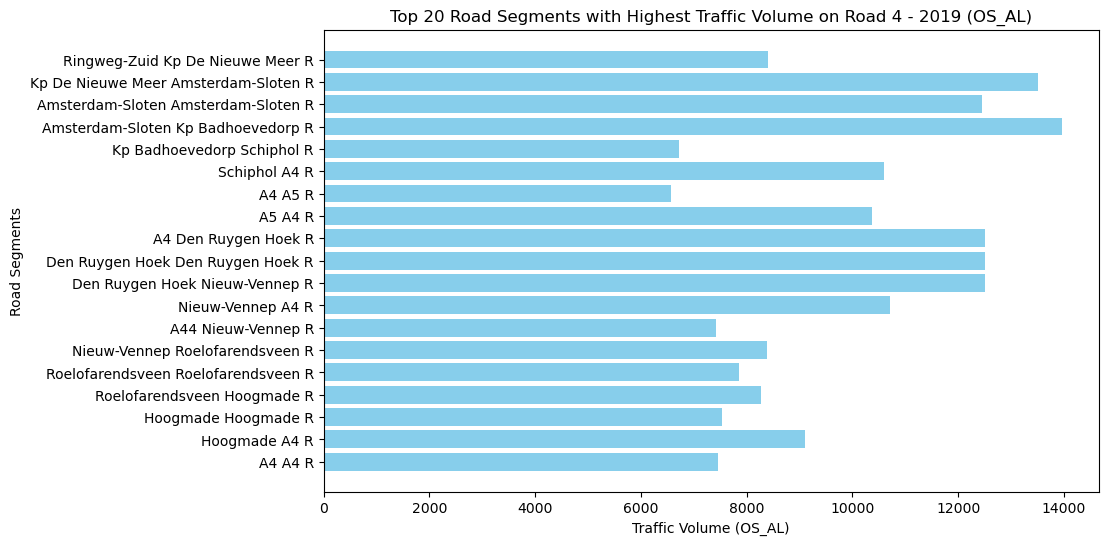

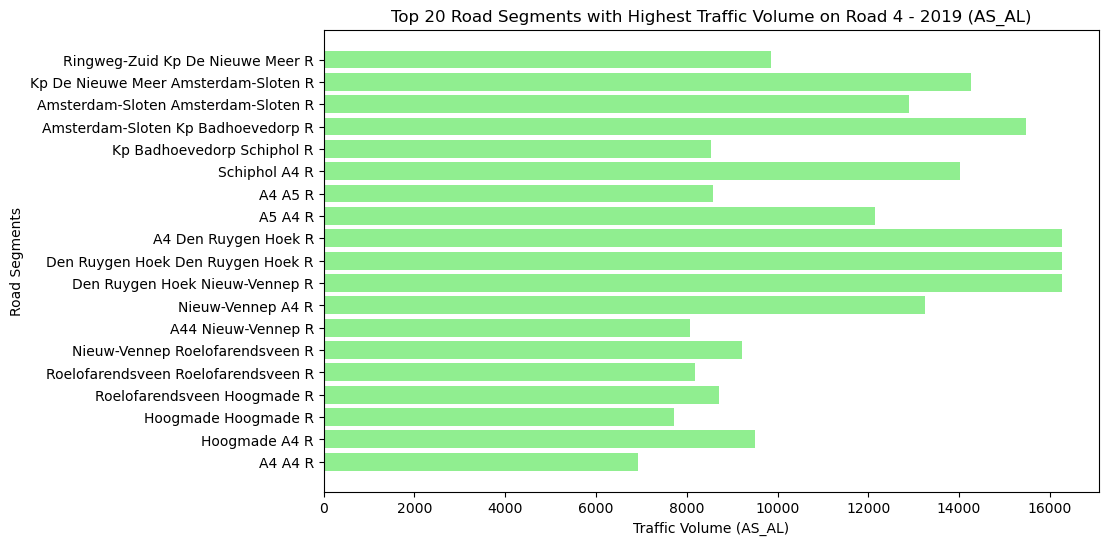

C:\Users\daank\AppData\Local\Temp\ipykernel_15964\472490359.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['Traject'] = selected_columns['Traject_van'].astype(str) + ' ' + selected_columns['Traject_naar'].astype(str) + ' ' + selected_columns['Ri_naar'].astype(str)


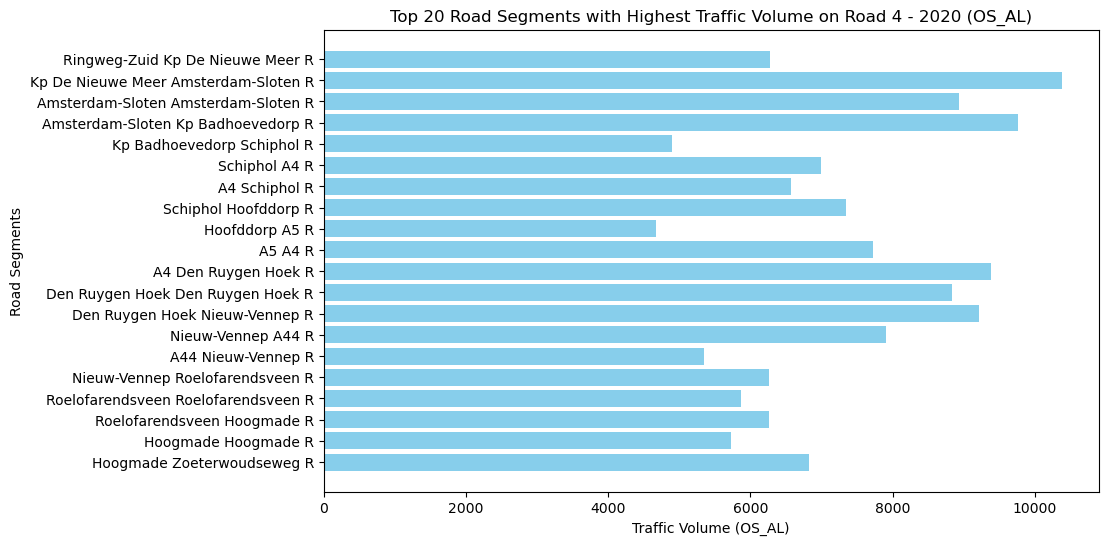

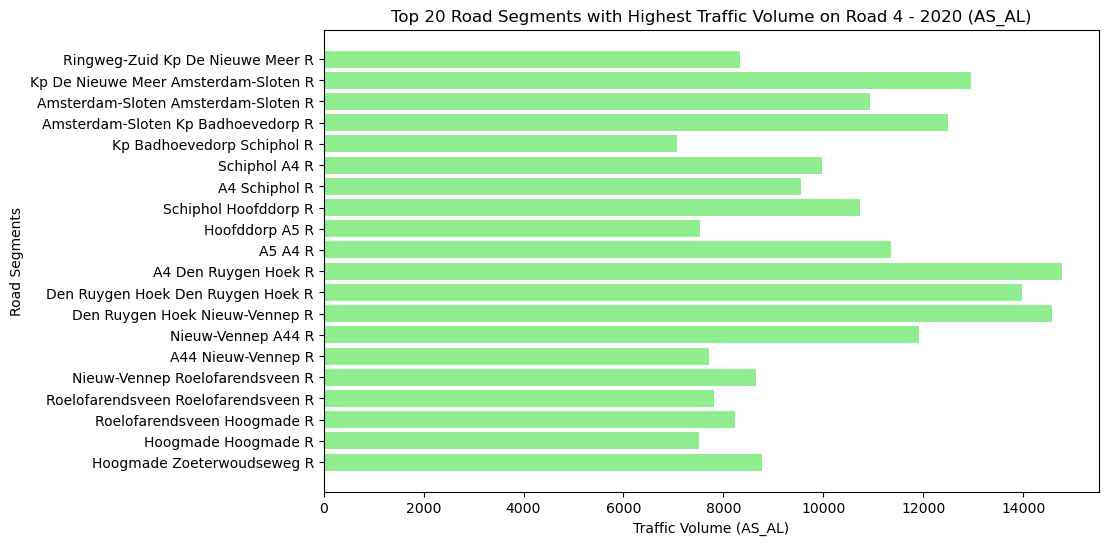

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_road_segments(year):
    # Construct the file path based on the input year
    file_path = f'datasets_spitsuren_wegvakken/INWEVA_{year}_spits.xlsx'
    
    # Load the Excel file
    data = pd.read_excel(file_path)
    
    # Select the relevant columns
    selected_columns = data[['Wegnr_van','Wegnr_naar','Hm_van','Hm_naar','Traject_van', 'Traject_naar', 
                             'etmaal_AL', 'OS_AL', 'AS_AL', 'Ri_naar', 'Baantype_naar', 'Baantype_van']]
    
    # Create a new 'Traject' column combining relevant columns
    selected_columns['Traject'] = selected_columns['Traject_van'].astype(str) + ' ' + selected_columns['Traject_naar'].astype(str) + ' ' + selected_columns['Ri_naar'].astype(str)
    
    # Filter for road number 4 and other conditions
    df_road_4 = selected_columns[
        (selected_columns['Wegnr_van'] == 4) & 
        (selected_columns['Wegnr_naar'] == 4) & 
        (selected_columns['Baantype_naar'] == 'HR') & 
        (selected_columns['Baantype_van'] == 'HR') & 
        (selected_columns['Ri_naar'] == 'R')
    ]
    
    # Sort the filtered DataFrame by 'Hm_van'
    df_road_4_sorted = df_road_4.sort_values(by='Hm_van', ascending=True)
    
    plt.figure(figsize=(10, 6))
    plt.barh(df_road_4_sorted['Traject'].head(20), df_road_4_sorted['OS_AL'].head(20), color='skyblue')
    plt.xlabel('Traffic Volume (OS_AL)')
    plt.ylabel('Road Segments')
    plt.title(f'Top 20 Road Segments with Highest Traffic Volume on Road 4 - {year} (OS_AL)')
    plt.gca().invert_yaxis()
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.barh(df_road_4_sorted['Traject'].head(20), df_road_4_sorted['AS_AL'].head(20), color='lightgreen')
    plt.xlabel('Traffic Volume (AS_AL)')
    plt.ylabel('Road Segments')
    plt.title(f'Top 20 Road Segments with Highest Traffic Volume on Road 4 - {year} (AS_AL)')
    plt.gca().invert_yaxis()
    plt.show()

    # Return the sorted DataFrame for further analysis
    return df_road_4_sorted.head(20)

# Example usage
df_road_2019 = analyze_road_segments(2019)
df_road_2020 = analyze_road_segments(2020)
